In [1]:
from udntools.region import ServiceRegion
from udntools.channel import BaseChannel
from udntools.utils.plot import get_circle
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from udntools.utils import cdf_y_axis

In [2]:
region = ServiceRegion(0, 100,
                       0, 100,
                       12, 10000,
                       bs_distribution="square_grid",
                       grid_l_1=20,
                       grid_l_2=20,
                       if_fix_bs=False)
channel = BaseChannel(4.0)

In [3]:
l1_array = np.arange(5, 26, 1)
l2_array = np.arange(5, 26, 1)

In [4]:
L1, L2 = np.meshgrid(l1_array, l2_array)
ase_uniform = np.zeros((np.shape(l2_array)[0],
                        np.shape(l2_array)[0]))
ase_gaussian = np.zeros((np.shape(l2_array)[0],
                         np.shape(l2_array)[0]))

In [5]:
region.set_ue_distribution('uniform')

for i, value_i in enumerate(l1_array):
    for j, value_j in enumerate(l2_array):
        region.set_bs_grid_l1_l2(value_i, value_j)
        sir_user_sim = channel.sir_vector(region.bs_position_,
                                          region.ue_position_)
        
        capacity = np.reshape(np.log2(1 + sir_user_sim), -1)

        ase_uniform[i, j] = np.sum(capacity) / region.ue_number_ \
                            * region.bs_number_ / 100 / 100

region.set_ue_distribution('gaussian')
region.set_ue_sigma(5.0)

for i, value_i in enumerate(l1_array):
    for j, value_j in enumerate(l2_array):
        region.set_bs_grid_l1_l2(value_i, value_j)
        sir_user_sim = channel.sir_vector(region.bs_position_,
                                          region.ue_position_)
        
        capacity = np.reshape(np.log2(1 + sir_user_sim), -1)

        ase_gaussian[i, j] = np.sum(capacity) / region.ue_number_ \
                             * region.bs_number_ / 100 / 100

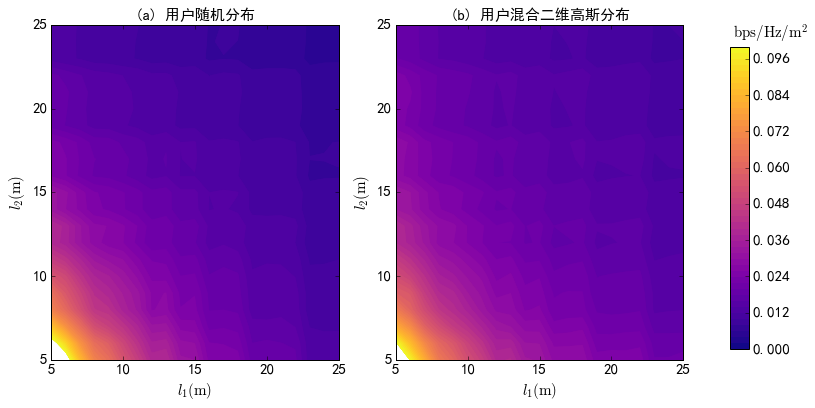

In [10]:
import matplotlib
params = {'axes.labelsize': 15,'axes.titlesize':10, 'text.fontsize': 15, 'legend.fontsize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
matplotlib.rcParams.update(params)

# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig = plt.figure(figsize=(13, 6))  
ax = fig.add_subplot(121)
for i in range(10):
    im1 = ax.contourf(L1, L2,ase_uniform,
                      np.linspace(0, 0.1, 51),
                      alpha=1,
                      antialiased=True,
                      cmap='plasma')
plt.xlim(5,25)
plt.ylim(5,25)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")
plt.title("(a) 用户随机分布",fontproperties = 'SimHei', fontsize=15)

ax = fig.add_subplot(122)
for i in range(10):
    im1 = ax.contourf(L1, L2,ase_gaussian,
                      np.linspace(0, 0.1, 51),
                      alpha=1,
                      antialiased=True,
                      cmap='plasma')
plt.xlim(5,25)
plt.ylim(5,25)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")
plt.title("(b) 用户混合二维高斯分布",fontproperties = 'SimHei')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im1, cax=cbar_ax).set_label("$\mathrm{bps/Hz/m^2}$", labelpad=-20, y=1.08, rotation=0)


fig.savefig('pc_grid_ase_show.pdf')
fig.savefig('pc_grid_ase_show.png')
plt.show()


In [13]:
np.max(ase_gaussian)

0.11932056851548185

In [14]:
np.max(ase_uniform)

0.12405547678046368